In [67]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, metrics, decomposition, mixture
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [16]:
digits = load_digits()

In [17]:
data = scale(digits.data)

In [19]:
def print_digits(images, y, max_n = 10):
    # Set up the figure sizes in inches.
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                        hspace=0.05,
                        wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # Plot the images in a matrix of 20 x 20.
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # Label the image with the target value.
        p.text(0, 14, str(y[i]))
        i = i + 1

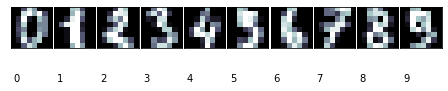

In [20]:
print_digits(digits.images, digits.target, max_n=10)

In [22]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, 
                                                                               test_size=0.25, 
                                                                               random_state=42)

In [23]:
n_samples, n_features = X_train.shape

In [24]:
n_digits = len(np.unique(y_train))

In [25]:
labels = y_train

In [30]:
clf = cluster.KMeans(init='k-means++', 
                     n_clusters=10,
                     random_state=42)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

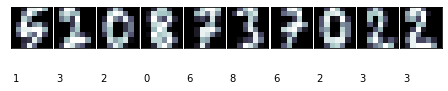

In [31]:
print_digits(images_train, clf.labels_, max_n=10)

In [32]:
# ^ The cluster number has nothing to do with the real number value.

array([1, 3, 2, ..., 6, 6, 0], dtype=int32)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

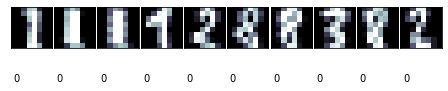

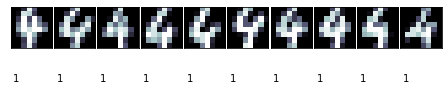

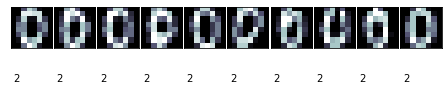

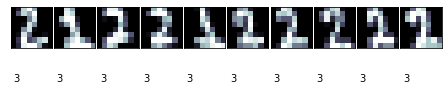

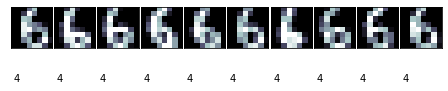

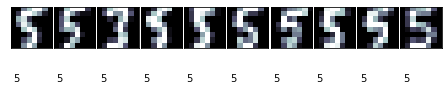

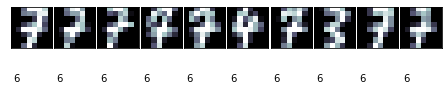

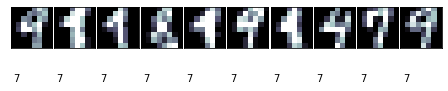

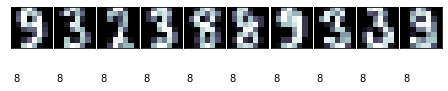

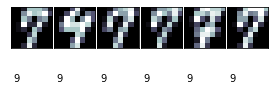

In [35]:
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [45]:
'Adjusted random score: {:.2f}'.format(metrics.adjusted_rand_score(y_test, y_pred))

'Adjusted random score: 0.57'

In [46]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])

In [47]:
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)

In [57]:
# Step size of the mesh.
h = 0.01

# Point the mesh [x_min, m_max] * [y_min, y_max].
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

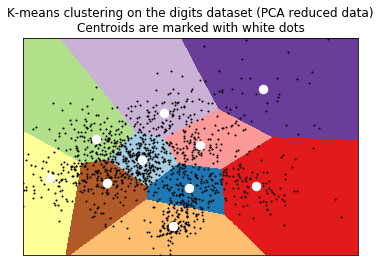

In [59]:
kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)

# Plot the centroids as white X.
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], 
            centroids[:, 1], 
            marker='.', 
            s=169, 
            linewidths=3, 
            color='w', 
            zorder=10)
plt.title('K-means clustering on the digits dataset (PCA reduced data)\nCentroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
None

## Alternative Clustering Methods

In [61]:
aff = cluster.AffinityPropagation()
aff.fit(X_train)
aff.cluster_centers_indices_.shape

(112,)

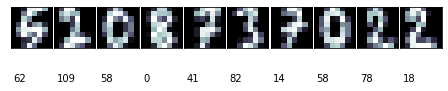

In [62]:
print_digits(images_train, aff.labels_, max_n=10)

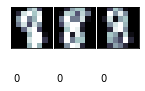

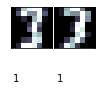

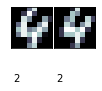

<Figure size 864x864 with 0 Axes>

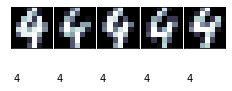

<Figure size 864x864 with 0 Axes>

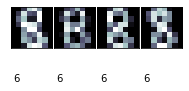

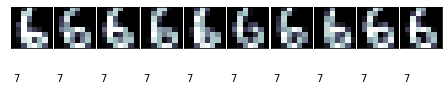

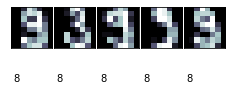

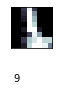

In [63]:
y_pred = aff.predict(X_test)
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [64]:
ms = cluster.MeanShift()
ms.fit(X_train)
ms.cluster_centers_.shape

(18, 64)

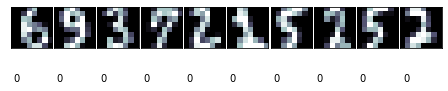

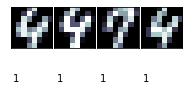

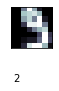

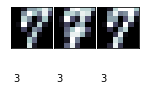

<Figure size 864x864 with 0 Axes>

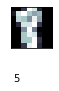

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [65]:
y_pred = ms.predict(X_test)
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [69]:
gm = mixture.GaussianMixture(n_components=n_digits,
                 covariance_type='tied',
                 random_state=42)
gm.fit(X_train)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [70]:
y_pred = gm.predict(X_test)
f'Adjusted rand score: {metrics.adjusted_rand_score(y_test, y_pred):.2f}'

'Adjusted rand score: 0.46'

In [75]:
# Homogeneity is a number between 0 and 1 (bigger is better). 
# A value of 1 indicates that clusters only contain data points from a single class, that is
# clusters effectively group similar instances.
f'Homegeneity score: {metrics.homogeneity_score(y_test, y_pred):.2f}'

'Homegeneity score: 0.62'

In [76]:
# Completeness is satisfied when every data point of a given class is within the same cluster.
# (Meaning that we have grouped all possible instances of the class, instead of building 
# several uniform but smaller clusters).
f'Completeness score: {metrics.completeness_score(y_test, y_pred):.2f}'

'Completeness score: 0.68'